<a href="https://colab.research.google.com/github/dayanallima/ciencia_dados/blob/main/MVP_SprintII_DayanaLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pontifícia Universidade Católica do Rio de Janeiro – PUC  Rio**

# Especialização em Ciência de Dados e Analytics

## Sprint II: Machine Learning & Analytics

## Parte A - Machine Learning: Modelo utilizando métodos clássicos para um problema de classificação ou ***regressão***

## Parte B - Machine Learning: Modelo utilizando Deep Learning para um problema de visão computacional ou ***processamento de linguagem natural***.

---

---

## Dayana de Lima e Silva


# Minimun Viable Product - MVP

#** PARTE A - REGRESSÃO**

# 1.Definição do Problema

## Descrição
Prever o valor de um imóvel com base em suas características.

## Modelo de Aprendizado
Esse MVP é um modelo de aprendizado supervisionado, pois é construído a partir dos dados de entrada que serão apresentados para um algoritmo na forma de pares ordenados (entrada – saída desejada). Esses dados são rotulados, pois já é de conhecimento, a saída esperada para cada entrada de dados. Nesse caso, o aprendizado (ou treinamento) consiste em apresentar para o algoritmo um número suficiente de exemplos de entradas e saídas desejadas (já rotuladas previamente). Assim, o objetivo do algoritmo é aprender uma regra geral que mapeie as entradas nas saídas corretamente, o que consiste no modelo final.

## Premissas
Os dados serão avaliados sem considerar questões particulares da cidade.

## Condições e Restrições

Disponibilizado no Kaggle, o dataset House Sales in King County, USA apresenta preços de venda de casas entre Maio/2014 e Maio/2015 e para acidade de King Country.

## Atributos

###-> id
Identificador único de cada casa

###-> date
Data da casa a venda.

###-> price
Preço da casa.

###-> bedrooms
Número de quartos.

###-> bathrooms
Número de banheiros, no qual .5 conta como lavabo.

###-> sqft_living
Área interna (ft²).

###-> sqft_lot
Área do terreno (ft²).

###-> floors
Número de andares.

###-> waterfront
Tem vista para o mar (1) ou não (0). (categórico)

###-> view
Valor de 0 a 4 informando se a vista é boa. (categórico)

###-> condition
Valor de 1 a 5 sobre a condição da casa. (categórico)

###-> grade
Nota de 1 a 13, no qual 1-3 pequenas construções, 7 construção e desing mediano, e 11-13 para construções de alto nível.

###-> sqft_above
Área do interior da casa, acima do nível do solo (ft²).

###-> sqft_basement
Área do interior da casa, abaixo do nível do solo (ft²).

###-> yr_built
Ano de construção da casa.

###-> yrrenovated
Último ano de renovação da casa.  

###-> zipcode
CEP da residência.

###-> lat
Latitude.

###-> long
Longitude.

###-> sqft_living15
Área do espaço interno para os 15 vizinhos mais próximos(ft²).

###-> sqft_lot15
Área do terreno para os 15 vizinhos mais próximos (ft²).

### ▶ Início do Código

## -> Configurações Iniciais

In [1]:
## Configuração para não exibir "Mensagens de Aviso" (Warnings)
# A determinação de omitir ou não uma mensagem de aviso é controlada
# pelo filtro de aviso, que é uma sequência de regras e ações correspondentes.
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Instalando a biblioteca Sklearn.
# Oferece uma ampla gama de algoritmos e ferramentas para tarefas comuns de aprendizado de máquina
#como classificação, regressão, agrupamento e pré-processamento de dados.
!pip install scikit-learn==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
## Importação de Pacotes

# Pandas: Pacote que fornece ferramentas com grande poder para manipulação e análise de dados, de maneira simples e eficiente.
# Numpy: Pacote cujo foco são as operações matemáticas.
# Matplotlib: Pacote para visualização de dados.
# Seaborn: Pacote de ferramentas para plotagem dos mais variados tipos de gráficos.
# Missingno: Pacote para tratamento de dados não representativos.
# Sklearn: Pacote de ferramentas para tarefas comuns de aprendizado de máquina.
# Os: Pacote que permite interação com o sistema operacional em que o programa está sendo executado.
# Tensorflow: Pacote para construir e treinar modleos de aprendizado de máquina e redes neurais.

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split # divide um conjunto de dados em treino e teste
from sklearn.metrics import mean_squared_error # calcula o erro médio quadrático
from sklearn.metrics import mean_absolute_error # calcula o erro absoluto
from sklearn.metrics import r2_score # calcula o coeficiente de determinação (R² score)

from sklearn.neighbors import KNeighborsRegressor # regressor KNN
from sklearn.linear_model import LinearRegression # regressor re Regressão Linear
from sklearn.svm import SVR # regressor de SVM
from sklearn.tree import DecisionTreeRegressor # regressor de Árvore de Decisão
from sklearn.ensemble import RandomForestRegressor # regressor de Random forest
from sklearn.ensemble import BaggingRegressor # regressor de Bagging
from sklearn.ensemble import VotingRegressor # regressor de Ensemble

from sklearn.model_selection import cross_val_score # permite realizar validação cruzada
from sklearn.model_selection import KFold # era os índices para a divisão dos dados em
# conjuntos de treinamento e teste durante a validação cruzada

from sklearn.model_selection import StratifiedKFold # classe de validação cruzada estratificada

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

from sklearn.impute import SimpleImputer # Preenche valores ausentes em conjuntos de dados

from tensorflow import keras # interface simples e intuitiva para a construção e treinamento de redes neurais

scaler = MinMaxScaler() #escalonamento dos dados

# 2.Coleta e Análise de Dados


## 2.1. Importação da Base de Dados

In [4]:
## Carga da Base de Dados
# O dataset está em domínio público no GitHub, uma plataforma de hospedagem de código-fonte.

dataset = pd.read_csv('https://github.com/dayanallima/ciencia_dados/blob/main/Preco_Venda_Casa.csv?raw=true')

##2.2. Explorando a Base de Dados

In [5]:
# Dimensões do dataset (linhas, colunas)
print('Dimensões do DataSet:')
dataset.shape

Dimensões do DataSet:


(21613, 21)

In [6]:
# Checagem das colunas do datase
print('Colunas do DataSet:')
dataset.columns

Colunas do DataSet:


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Excluindo colunas desnecessárias para análise
# id - ID unico para cada casa.
# date - Data da casa a venda.
# yrrenovated - Último ano de renovação da casa.
# zipcode - CEP da residência.

columns_to_remove = ['id', 'date', 'yr_renovated', 'zipcode']
dataset = dataset.drop(columns_to_remove, axis=1)

In [8]:
# Visualização das 5 primeiras linhas
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,47.6168,-122.045,1800,7503


In [9]:
# Visualização das 5 últimas linhas
dataset.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020.0,0,2008,47.5941,-122.299,1020,1357


In [10]:
# Mostra as informações resumidas do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


In [11]:
# Remove linhas com valores nulos
dataset = dataset.dropna()

# Vizualiza novamente os dados sem os nulos
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Faz um resumo estatístico do dataset
dataset.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,47.560046,-122.213894,1986.559576,12769.025357
std,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,0.138568,0.140831,685.416548,27305.369808
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


É interessante observar que o imóvel mais cara custa 7,7 MM US$ e o que tem mais quartos possui 33. A próxima linha do código mostrará se trata da mesma casa.


In [13]:
# Checando se o imóvel mais caro possui mais quartos

imovel_mais_caro = dataset.loc[dataset['price'] == 7.700000e+06]
print(imovel_mais_caro)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
7252  7700000.0         6        8.0        12050     27600     2.5   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
7252           0     3          4     13      8570.0           3480      1910   

          lat     long  sqft_living15  sqft_lot15  
7252  47.6298 -122.323           3940        8800  


O imóvel mais caro possui 6 quartos e 8 banheiros.

In [14]:
# Checando quanto custa o imóvel com mais quartos

imóvel_mais_quartos = dataset.loc[dataset['bedrooms'] == 33]
print(imóvel_mais_quartos)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15870  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15870           0     0          5      7      1040.0            580   

       yr_built      lat     long  sqft_living15  sqft_lot15  
15870      1947  47.6878 -122.331           1330        4700  


O imóvel com mais quartos custa US$ 640.000.

#3.Preparação dos Dados

Passo para construção de modelos de aprendizado de máquina, onde separamos as variáveis independentes (características ou atributos) das variáveis dependentes (rótulos ou saídas que queremos prever).

##3.1. Normalização

A normalização de dados consiste em remodelar colunas numéricas para uma escala padrão. A normalização coloca os dados no intervalo entre 0 e 1 ou -1 e 1, caso haja valores negativos, sem distorcer as diferenças nas faixas de valores. Ou seja, ela não retira os outliers (valores extremos).

In [15]:
# Separa as variáveis preditoras (ou características) do conjunto de dados
# (representadas por X) e a variável de destino ou rótulo (representada por Y).
X = dataset.drop('price', axis=1)
Y = dataset['price']

In [16]:
# Normalização dos dados
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

##3.2. Base de Treino e Base de Teste

Teste e treinamento de modelos fazem parte de uma técnica comum na ciência de dados e na aprendizagem de máquina. Envolve a divisão dos dados em dois conjuntos distintos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para ajustar os parâmetros do modelo. O conjunto de teste é usado para avaliar a capacidade do modelo de generalizar, ou seja, sua capacidade de fazer previsões precisas em dados que não foram usados no treinamento.

In [17]:
## A função train_test_split da biblioteca scikit-learn é usada para dividir os
## dados em conjuntos de treinamento e teste. E é composta dos seguintes elementos:

# X e Y são as variáveis de entrada e a variável alvo, respectivamente.
# test_size=0.2 especifica que 20% dos dados serão usados para teste e 80% para treinamento.
# random_state=26 define a semente aleatória como 20, garantindo que a divisão dos dados
# seja a mesma toda vez que o código for executado. Isso é útil para reprodutibilidade.

# A função retornará quatro conjuntos de dados:

# X_train: O conjunto de treinamento de características, que conterá 80% dos dados originais.
# X_test: O conjunto de teste de características, que conterá 20% dos dados originais.
# y_train: A variável alvo do conjunto de treinamento, correspondente às características de X_train.
# y_test: A variável alvo do conjunto de teste, correspondente às características de X_test.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=26)
print('treino:', len(y_train))
print('teste:', len(y_test))

treino: 17288
teste: 4323


# 4.Visualização | Mapa de Calor


As visualizações ajudam a identificar padrões, tendências e anomalias nos dados, permitindo que se faça inferências e tome decisões.

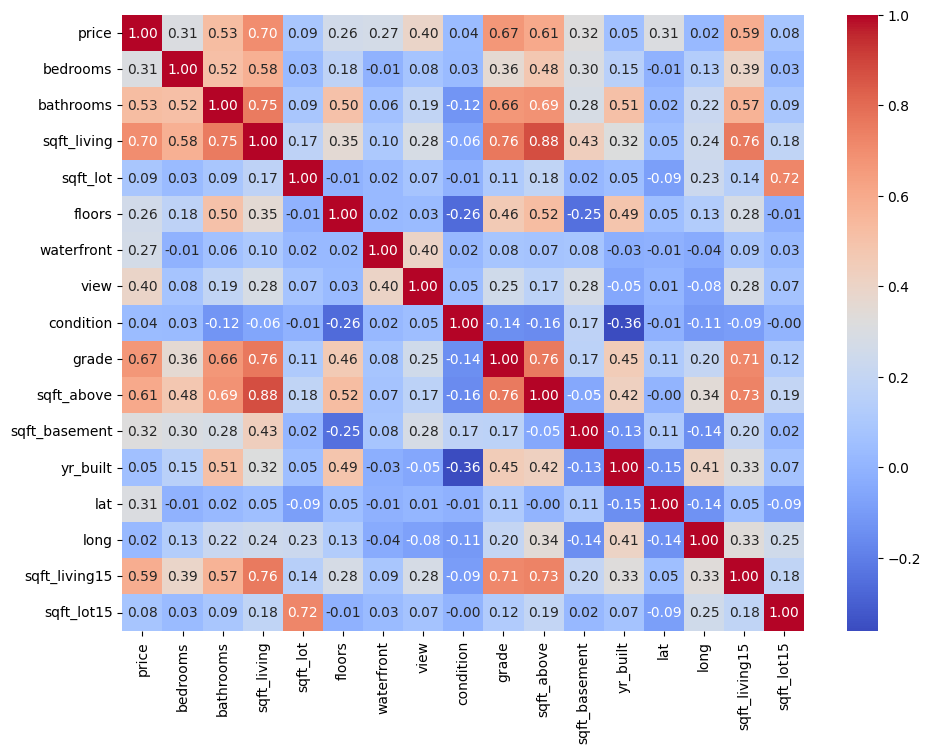

In [18]:
# Visualização por meio do mapa de Calor
# DataFrame.corr() calcula a correlação de pares de colunas, excluindo NaN e valores nulos.
# Por padrão é computado a Correlação de Pearson, seu coeficiente de correlação mede a
# relação estatística, ou associação, entre duas variáveis contínuas.

corr = dataset.corr(method='pearson')

plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
# print(corr)


Dentro do esperado, o mapa de calor mostra a maior correlação para os atributos sqft_living (espaço interior) e
sqft_above - (interior da casa, acima do nível do solo).
As correlações baixas e negativas são reflexo da não relação, também esperada, das demais variáveis por não ter depedência entre elas.

#5.Regressão - Algoritmos de Machine Laearning

In [19]:
# Variável para armezenar os dados e mostrar o resultado final
resultado = {}

#5.1. Árvore de Decisão

A árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que pode ser usado para tarefas de classificação e regressão. A árvore de decisão divide os dados com base em um conjunto de regras de decisão para tomar decisões preditivas.

In [20]:
# Definindo o Modelo de Árvore de Decisão
modelo_01 = DecisionTreeRegressor(random_state=26)
modelo_01.fit(X_train, y_train)

DecisionTreeRegressor(random_state=26)

#5.1.a. Árvore de Decisão - Previsão

In [21]:
# Usando o Modelo_01 para fazer previsões nos dados de teste X_test
y_pred = modelo_01.predict(X_test)

In [22]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.1.b. Árvore de Decisão - Armazenamento do Resultado

In [23]:
resultado['Árvore de Decisão'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7124933121167488
MAE : 101237.07587323617
MSE : 35296307596.01399
RMSE: 187873.11568187183


#5.2. Random Forest

Random Forest é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para realizar tarefas de classificação e regressão. Em vez de confiar em uma única árvore de decisão, o Random Forest cria um conjunto de árvores de decisão e faz a previsão com base na média ou na maioria das previsões dessas árvores.

In [24]:
# Definindo o Modelo de Random Forest
modelo_02 = RandomForestRegressor(n_estimators=100, random_state=26)
modelo_02.fit(X_train, y_train)

RandomForestRegressor(random_state=26)

#5.2.a. Random Forest - Previsão

In [25]:
# Usando o Modelo_02 para fazer previsões nos dados de teste X_test
y_pred = modelo_02.predict(X_test)

In [26]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.2.b. Random Forest - Armazenamento do Resultado

In [27]:
resultado['Random Forest'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8868692109486765
MAE : 68391.40051320732
MSE : 13888717366.313154
RMSE: 117850.4024868526


#5.3. Bagging

Bagging (Bootstrap Aggregating) é uma técnica de aprendizado de máquina que utiliza o conceito de ensemble learning (aprendizado em conjunto) para melhorar o desempenho e a robustez dos modelos.

In [28]:
# Definindo o Modelo de Bagging
modelo_base = DecisionTreeRegressor(random_state=26)
modelo_03 = BaggingRegressor(base_estimator=modelo_base, n_estimators=10, random_state=26)
modelo_03.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=26),
                 random_state=26)

#5.3.a. Bagging - Previsão

In [29]:
# Usando o Modelo_03 para fazer previsões nos dados de teste X_test
y_pred = modelo_03.predict(X_test)

In [30]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.3.b. Bagging - Armazenamento do Resultado

In [31]:
resultado['Bagging'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8705834220657769
MAE : 72623.02107415485
MSE : 15888073339.86183
RMSE: 126047.90097364505


#5.4. K-NN (k-Nearest Neighbors)

K-NN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado utilizado para classificação e regressão. O K-NN classifica ou prevê novos pontos de dados com base na proximidade com os vizinhos mais próximos no conjunto de dados de treinamento.

In [32]:
# Definindo o Modelo de KNN
modelo_04 = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
modelo_04.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

#5.4.a. K-NN (k-Nearest Neighbors) - Previsão

In [33]:
# Usando o Modelo_04 para fazer previsões nos dados de teste X_test
y_pred = modelo_04.predict(X_test)

In [34]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.4.b. K-NN (k-Nearest Neighbors) - Armazenamento do Resultado

In [35]:
resultado['K-NN'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7956821665820843
MAE : 91700.18775541677
MSE : 25083469009.939575
RMSE: 158377.6152426206


#5.5. SVM (Support Vector Machines)

Support Vector Machines (SVM), ou Máquinas de Vetores de Suporte, é um algoritmo de aprendizado de máquina supervisionado utilizado para tarefas de classificação e regressão. Ele é conhecido por sua eficácia em problemas de classificação binária e por sua capacidade de lidar com dados de alta dimensionalidade.

In [36]:
# Definindo o Modelo de SVM
modelo_05 = SVR()
modelo_05.fit(X_train, y_train)

SVR()

#5.5.a. SVM (Support Vector Machines) - Previsão

In [37]:
# Usando o Modelo_05 para fazer previsões nos dados de teste X_test
y_pred = modelo_05.predict(X_test)

In [38]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.5.b. SVM (Support Vector Machines) - Armazenamento do Resultado

In [39]:
resultado['SVM'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : -0.06151567406955549
MAE : 221780.774224504
MSE : 130318998927.64845
RMSE: 360997.22842100664


#5.6. Regressão Linear

A regressão linear é um algoritmo de aprendizado de máquina utilizado para realizar tarefas de regressão, ou seja, prever valores numéricos contínuos com base em variáveis independentes.

O objetivo da regressão linear é modelar a relação linear entre uma variável de saída (variável dependente) e uma ou mais variáveis de entrada (variáveis independentes).

In [40]:
# Definindo o Modelo de Regressão Linear
modelo_06 = LinearRegression()
modelo_06.fit(X_train, y_train)

LinearRegression()

#5.6.a. Regressão Linear - Previsão

In [41]:
# Usando o Modelo_06 para fazer previsões nos dados de teste X_test
y_pred = modelo_06.predict(X_test)

In [42]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.6.b. Regressão Linear - Armazenamento do Resultado

In [43]:
resultado['Regressão Linear'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7081528477872958
MAE : 125085.80065949388
MSE : 35829172988.50223
RMSE: 189285.95560289788


#5.7. Ensemble

ensemble learning (aprendizado em conjunto) é uma abordagem que combina múltiplos modelos de aprendizado para melhorar o desempenho e a robustez das previsões. Em vez de confiar em um único modelo, ensemble learning utiliza a sabedoria coletiva de vários modelos para obter resultados mais precisos e confiáveis.

In [44]:
# Definindo o Modelo de Ensemble
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=26)

modelo_07 = VotingRegressor([('LR', r1), ('RF', r2)])
modelo_07.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('RF',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=26))])

#5.7.a. Ensemble - Previsão

In [45]:
# Usando o Modelo_07 para fazer previsões nos dados de teste X_test
y_pred = modelo_07.predict(X_test)

In [49]:
r2 = r2_score(y_test,y_pred) # calcula o coeficiente de determinação R²
mae = mean_absolute_error(y_test,y_pred) # calcula o erro médio absoluto (MAE)
mse = mean_squared_error(y_test,y_pred, squared=True) # calcula o erro médio quadrático (MSE)
rmse = mean_squared_error(y_test,y_pred, squared=False) # calcula a raiz quadrada do erro médio quadrático (RMSE)

#5.7.b. Ensemble - Armazenamento do Resultado

In [50]:
resultado['Ensemble'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8418433209056075
MAE : 87101.70713863919
MSE : 19416406744.41144
RMSE: 139342.7671047602


# 6.Resultados

In [51]:
# Visualização de todos os resultados
cm = sns.color_palette('Blues_r', as_cmap=True)
pd.DataFrame(resultado).T.style.background_gradient(subset=['R2'],
             cmap=cm).highlight_max(subset=['R2'], axis=0)

,R2,MAE,MSE,RMSE
Árvore de Decisão,0.712493,101237.075873,35296307596.013992,187873.115682
Random Forest,0.886869,68391.400513,13888717366.313154,117850.402487
Bagging,0.870583,72623.021074,15888073339.861830,126047.900974
K-NN,0.795682,91700.187755,25083469009.939575,158377.615243
SVM,-0.061516,221780.774225,130318998927.648453,360997.228421
Regressão Linear,0.708153,125085.800659,35829172988.502228,189285.955603
Ensemble,0.841843,87101.707139,19416406744.411442,139342.767105


#6.1. Análise

**Análise do R²**

* Random Forest
Tem o maior valor de R², indicando que tem a melhor capacidade de explicar a variância dos dados em relação às outras estratégias.

* Bagging
Tmbém apresenta um bom desempenho em termos de R², sendo muito próximo ao Random Forest.

* K-NN
Tem um valor elevado de R², indicando que também possui um bom poder de explicação dos dados, embora seja ligeiramente inferior ao Random Forest e Bagging.

* Árvore de Decisão e  Regressão Linear
Tem valores razoáveis de R², mas inferiores aos das outras estratégias mencionadas acima.

* SVM
Tem um valor negativo de R², indicando que não se ajusta bem aos dados.

* Ensemble
Tem resultados promissores em todas as métricas, com valores de R², MAE e RMSE próximos aos do Random Forest e Bagging.

**Análise do MAE (Erro Absoluto Médio) e do RMSE (Raiz Quadrada do Erro Quadrático Médio)**

* Random Forest apresenta os menores valores, seguido pelo Bagging. Isso indica que essas estratégias têm um bom desempenho em termos de previsões precisas e baixa dispersão dos erros.


# 7.Conclusão

---

Al´m das métricas é importante considerar outros fatores, como interpretabilidade do modelo, tempo de treinamento e escalabilidade, para tomar uma decisão final.
Assim, Random Forest, Bagging e Ensemble são as melhores estratégias com comportamentos semelhantes.

#** PARTE B - PROCESSAMENTO DE LINGUAGEM NATURAL **

# 1.Definição do Problema

## Descrição
A Olist é uma empresa de plataforma de vendas que oferece suporte de gestão de vendas, onde os lojistas podem gerenciar seus pedidos, estoque, preços e outras informações importantes para o negócio.
O problema desse MVP é por meio do processamneto de linguagem natural avaliar a relação entre consumidores e plataformas com base na análise das revisões feitas pelos mesmos.

## Modelo de Aprendizado
Esse MVP é um modelo de aprendizado supervisionado, pois é construído a partir dos dados de entrada que serão apresentados para um algoritmo na forma de pares ordenados (entrada – saída desejada). Esses dados são rotulados, pois já é de conhecimento, a saída esperada para cada entrada de dados. Nesse caso, o aprendizado (ou treinamento) consiste em apresentar para o algoritmo um número suficiente de exemplos de entradas e saídas desejadas (já rotuladas previamente). Assim, o objetivo do algoritmo é aprender uma regra geral que mapeie as entradas nas saídas corretamente, o que consiste no modelo final.

## Premissas
Informações relativas ao funcionamento da plataforma não foram consideradas.

## Condições e Restrições

Disponibilizados no Kaggle, os dados analisados concentraram-se nas informações de consumidores, pedidos e avaliações.

## Atributos

###-> customer_city
Cidade do cliente.

###-> customer_id
Identificador do cliente.

###-> customer_state
Estado do cliente.

###-> customer_unique_id
Identificador exclusivo do cliente.

###-> customer_zip_code_prefix
CEP do cliente.

###-> order_approved_at
Data e hora da aprovação da compra.

###-> order_delivered_carrier_date
Data e hora de entrega do pedido à transportadora.

###-> order_delivered_customer_date
Data e hora de entrega do pedido ao cliente.

###-> order_estimated_delivery_date
Data e hora daentrega estimada.

###-> order_id
Identificador do pedido.

###-> order_purchase_timestamp
Data e hora da compra.

###-> order_status
Status do pedido.

###-> review_answer_timestamp
Resposta à avaliação.

###-> review_comment_message
Corpo do texto da avaliação.

###-> review_comment_title
Título da avaliação.

###-> review_creation_date
Data da avaliação.

###-> review_id
Identificador da avaliação.

###-> review_score
Pontuação dada na avaliação.


### ▶ Início do Código


## -> Configurações Iniciais

In [52]:
## Configuração para não exibir "Mensagens de Aviso" (Warnings)
# A determinação de omitir ou não uma mensagem de aviso é controlada
# pelo filtro de aviso, que é uma sequência de regras e ações correspondentes.
import warnings
warnings.filterwarnings("ignore")

In [53]:
## Instalando a biblioteca Sklearn.
# Oferece uma ampla gama de algoritmos e ferramentas para tarefas comuns de aprendizado de máquina
#como classificação, regressão, agrupamento e pré-processamento de dados.
!pip install scikit-learn==0.23.2

  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... canceled
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 397, in res

In [54]:
# Instalando o módulo unidecode que é uma biblioteca externa que fornece
# funcionalidades para remover a acentuação de caracteres em strings.
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.6 MB/s eta 0:00:00


In [55]:
# Baixando o modelo de processamento de linguagem natural para a língua portuguesa
# fornecido pela biblioteca SpaCy.
!python -m spacy download pt

2023-07-22 00:05:29.769882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [56]:
## Importação de Pacotes Básicos

# Pandas: Pacote que fornece ferramentas com grande poder para manipulação e análise de dados,
# de maneira simples e eficiente.
# Numpy: Pacote cujo foco são as operações matemáticas.
# Matplotlib: Pacote para visualização de dados.
# Seaborn: Pacote de ferramentas para plotagem dos mais variados tipos de gráficos.

import pandas as pd

pd.set_option('max_colwidth', 400) # usada para definir a largura máxima de exibição de colunas em
# um DataFrame do pandas

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') # rojetado para se assemelhar ao estilo de gráficos usado no site
# de notícias e análises políticas FiveThirtyEight.

import numpy as np
import seaborn as sns

In [57]:
## Importação de Pacotes Sklearn
# Sklearn: Pacote de ferramentas para tarefas comuns de aprendizado de máquina.

from sklearn.model_selection import train_test_split # divide um conjunto de dados em treino e teste

from sklearn.feature_extraction.text import TfidfVectorizer # é usada para transformar uma coleção de
# documentos de texto em uma matriz de recursos TF-IDF (Term Frequency-Inverse Document Frequency).

from sklearn.ensemble import ExtraTreesClassifier # implementação do algoritmo de classificação chamado
# Extra Trees (Extra Randomized Trees) no scikit-learn.

from sklearn.naive_bayes import MultinomialNB # implementação do algoritmo de classificação chamado
# Naive Bayes Multinomial no scikit-learn.

from sklearn.metrics import accuracy_score, log_loss,confusion_matrix # métricas de avaliação de desempenho

from sklearn.decomposition import NMF # Non-Negative Matrix Factorization é um algoritmo de decomposição
# de matriz não negativa

from sklearn.manifold import TSNE # t-Distributed Stochastic Neighbor Embedding) é um algoritmo de redução
# de dimensionalidade não linear

In [58]:
## Importação de Pacotes para Processamento de linguagem natural

# Re: Pacote que fornece funcionalidades para trabalhar com expressões regulares.
# Unicode:  Biblioteca externa do Python que fornece uma função para remover a acentuação de
# caracteres em strings.
# Spacy: Pacote de processamento de linguagem natural (PLN) de código aberto.
# NLTH: Pacote de processamento de linguagem natural (PLN) de código aberto.
# Gensim: Pacote de processamento de linguagem natural (PLN) de código aberto.
# PIL: Python Imaging Library,  para processamento de imagens em Python.
# Wordcloud: Pacote para criar nuvens de palavras.
# Random: PAcote com funcionalidades relacionadas à geração de números pseudoaleatórios.

import re
import spacy
import random
import nltk

from nltk import FreqDist # calcula a distribuição de frequência de um conjunto de elementos
# em uma lista ou sequência

nltk.download('rslp') #download e instalação do recurso RSLP no seu ambiente Python.

from gensim.models.phrases import Phrases, Phraser # utilizadas para realizar a detecção de
# frases ou bigramas em um corpus de texto.

from gensim.models import Word2Vec # utilizada para treinar modelos de representação vetorial
# de palavras.

from unidecode import unidecode

from PIL import Image
from wordcloud import WordCloud

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


# 2.Coleta e Análise de Dados


## 2.1. Importação da Base de Dados

In [59]:
## Carga das Bases de Dados
# Os datasets estão em domínio público no GitHub, uma plataforma de hospedagem de código-fonte.

# Dataset com dados dos clientes
df_clientes = pd.read_csv('https://github.com/dayanallima/ciencia_dados/blob/main/olist_customers_dataset.csv?raw=true')

# Dataset com dados dos pedidos
df_pedidos = pd.read_csv('https://github.com/dayanallima/ciencia_dados/blob/main/olist_orders_dataset.csv?raw=true')

# Dataset com dados das avaliações dos pedidos
df_avaliacao = pd.read_csv('https://github.com/dayanallima/ciencia_dados/blob/main/olist_order_reviews_dataset.csv?raw=true')

##2.2. Explorando a Base de Dados

In [60]:
# Dimensões do dataset (linhas, colunas)
print('Dimensões do DataSet Clientes:')
df_clientes.shape

Dimensões do DataSet Clientes:


(99441, 5)

In [61]:
# Dimensões do dataset (linhas, colunas)
print('Dimensões do DataSet Pedidos:')
df_pedidos.shape

Dimensões do DataSet Pedidos:


(99441, 8)

In [62]:
# Dimensões do dataset (linhas, colunas)
print('Dimensões do DataSet Avaliação:')
df_avaliacao.shape

Dimensões do DataSet Avaliação:


(99224, 7)

##2.2.a. Construindo um novo dataset

In [63]:
# Checagem das colunas do datase
print('Colunas do DataSet Clientes:')
df_clientes.columns

Colunas do DataSet Clientes:


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [64]:
# Checagem das colunas do datase
print('Colunas do DataSet Pedidos:')
df_pedidos.columns

Colunas do DataSet Pedidos:


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [65]:
# Checagem das colunas do datase
print('Dimensões do DataSet Avaliação:')
df_avaliacao.columns

Dimensões do DataSet Avaliação:


Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [66]:
# Construindo um dataset a partir da manipulação das bases de dados
# Unindo os datasets Consumidores e Pedidos por meio da coluna 'customer_id'
df = df_clientes.merge(df_pedidos, how='left', on='customer_id')

In [67]:
# Construindo um dataset a partir da manipulação das bases de dados
# Unindo o dataset da linha anterior com Avaliação de pedidos por meio da coluna 'order_id'
df = df.merge(df_avaliacao, how='left', on='order_id')

In [68]:
# Checagem das colunas do datase agrupado
print('Dimensões do DataSet Agrupado:')
df.columns

Dimensões do DataSet Agrupado:


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [69]:
# Define a semente para a geração de números aleatórios
np.random.seed(100)

# Faz a amostragem aleatória de 1 registro do DataFrame df.
# Isso seleciona aleatoriamente uma linha do DataFrame.
# .T é usado para transpor o resultado
df.sample(1).T

,72464
customer_id,336efbe454423ed05946e5bdfd1810f7
customer_unique_id,3c24feb1177149a73ee87c838ad1a04a
customer_zip_code_prefix,35585
customer_city,pimenta
customer_state,MG
order_id,d1bbc3ea80f956f0a139a12f1ef2ca28
order_status,delivered
order_purchase_timestamp,2018-02-03 18:58:52
order_approved_at,2018-02-03 22:49:33
order_delivered_carrier_date,2018-02-06 17:42:12


#3.Corpus

Corpus refere-se a um conjunto de textos ou documentos que são utilizados como base de dados para análise e modelagem de linguagem. Um corpus pode abranger uma ampla variedade de tipos de texto, como livros, artigos, transcrições de conversas, mensagens de mídia social, entre outros.

## 3.1. Análise e tratamento do conteúdo dos comentários

A coluna "review_comment_message" contém as informações alvo desse MVP. Nela estão os comentários base da análise.

In [70]:
## Estatística Descritiva
# Calculndo o comprimeto das sentenças
df['review_comment_message'].str.len().describe()

count    40977.000000
mean        68.637675
std         53.849207
min          1.000000
25%         28.000000
50%         53.000000
75%         95.000000
max        208.000000
Name: review_comment_message, dtype: float64

* O número total de comentários é 40.977.
* A média do comprimento das sentenças dos comentários é aproximadamente 68,64 caracteres.
* O desvio padrão do comprimento das sentenças é aproximadamente 53.85 caracteres, ou seja, alto. Isso indica que os comprimentos das sentenças variam bastante em torno da média. Mas, é aceitável dentro do universo de comentários de sites de compras.
* O menor comprimento encontrado nas sentenças dos comentários é 1 caractere.
* 25% dos comentários têm 28 caracteres ou menos.
* Metade dos comentários tem 53 caracteres ou menos, e a outra metade tem mais de 53 caracteres.
* 75% dos comentários têm 95 caracteres ou menos.
* O maior comprimento encontrado nas sentenças dos comentários é 208 caracteres.

In [71]:
# Valores Nulos e Registros Duplicados
print('Dataset sem alterações:', df.shape)
print('Valores Nulos na Coluna "review_comment_message" : ', df['review_comment_message'].isnull().sum())
print('Registros Duplicados na Coluna "review_comment_message": ', df['review_comment_message'].duplicated(keep=False).sum())


Dataset sem alterações: (99992, 18)
Valores Nulos na Coluna "review_comment_message" :  59015
Registros Duplicados na Coluna "review_comment_message":  65015


## 3.1.a. Adequções dos comentários

In [72]:
## Adequações

# Remove valores ausentes na Coluna "review_comment_message"
df = df[~df['review_comment_message'].isna()].reset_index(drop=True)

# Filtra as linhas da coluna "review_comment_message" que contém pelo menos um caractere alfanumérico.
df = df[df['review_comment_message'].str.contains("\w")]

# Filtra as linhas da coluna "review_comment_message" que tem um comprimento maior que 5 caracteres.
df = df[df['review_comment_message'].str.len() > 5]

# Remove as linhas duplicadas com base na coluna "review_comment_message"
df = df.drop_duplicates('review_comment_message').reset_index(drop=True)


In [73]:
# Análise após remoção dos Valores Nulos e Registros Duplicados
print('\nFormato do dataset após remoção de duplicados e nulos:', df.shape)
print('Valores Nulos na Coluna "review_comment_message": ', df['review_comment_message'].isnull().sum())
print('Registros Duplicados na Coluna "review_comment_message": ', df['review_comment_message'].duplicated(keep=False).sum())



Formato do dataset após remoção de duplicados e nulos: (35936, 18)
Valores Nulos na Coluna "review_comment_message":  0
Registros Duplicados na Coluna "review_comment_message":  0


In [74]:
# Calcula as estatísticas descritivas do comprimento das sentenças na coluna 'review_comment_message'
print(df['review_comment_message'].str.len().describe())

# Mostra uma mensagem na tela indicando que as próximas linhas exibirão as sentenças com 6 caracteres.
print("\nSentenças de 6 caracteres")

# Restringe as sentenças a pelo menos 6 caracteres
print(df['review_comment_message'][df['review_comment_message'].str.len() == 6].head())

count    35936.000000
mean        76.180293
std         52.677845
min          6.000000
25%         36.000000
50%         60.000000
75%        103.000000
max        208.000000
Name: review_comment_message, dtype: float64

Sentenças de 6 caracteres
136    Ótima 
370    Otimo.
441    otimo.
569    Ótimo 
767    Gostei
Name: review_comment_message, dtype: object


O objetivo de um corpus é fornecer uma coleção representativa de dados textuais para realizar pesquisas e desenvolver modelos de PLN. O tamanho e a diversidade do corpus podem variar dependendo do objetivo da análise ou da tarefa em questão. Alguns corpus são criados especificamente para um domínio ou tarefa específica, enquanto outros são construídos para representar um conjunto mais amplo de textos de uma determinada língua ou cultura.

**Foi possível identificar ocorrências de textos de avaliações com comprimentos de apenas 1 caractere, avaliações nulas e registros duplicados. Após retirada de todos os registros duplicados e nulos, e estabelecendo o comprimento mínimo de 6 caracteres, o conjunto de dados ficou com 35.936 observações.**

##3.2. Balanceamento de Classes

O balanceamento de classes é uma técnica usada em aprendizado de máquina para lidar com conjuntos de dados desbalanceados, ou seja, conjuntos de dados em que as classes têm quantidades significativamente diferentes de exemplos. Essa situação é comum em muitos problemas de classificação da vida real, onde uma classe pode ter muito mais instâncias do que outras.

**Para o MVP em questão, o balanceamento de classes será realizado com a diminuição do corpus para igualar a quantidade de classes, onde serão selecionadas as avaliações de pontuação 2 e 1 como negativas, enquanto as de pontuação 5 serão definidas como positivas. De cada conjunto serão selecionadas 20.000 amostras, resultando em um corpus igualmente distribuído.**

A coluna "review score", contém a pontuação referente aos comentários.

## 3.2.a. Visão antes do balanceamento

In [75]:
# Cálculo das contagens de cada valor único na coluna "review_score"
rating_counts = df['review_score'].value_counts().reset_index().sort_values('index').iloc[:,1].tolist()

# Cálculo da proporção (%) de cada valor único na coluna 'review_score' em relação ao total de amostras.
rating_p = round(df['review_score'].value_counts(normalize=True).reset_index()
                 .sort_values('index').iloc[:,1] * 100, 1).apply(lambda x: '{} %'.format(x)).tolist()

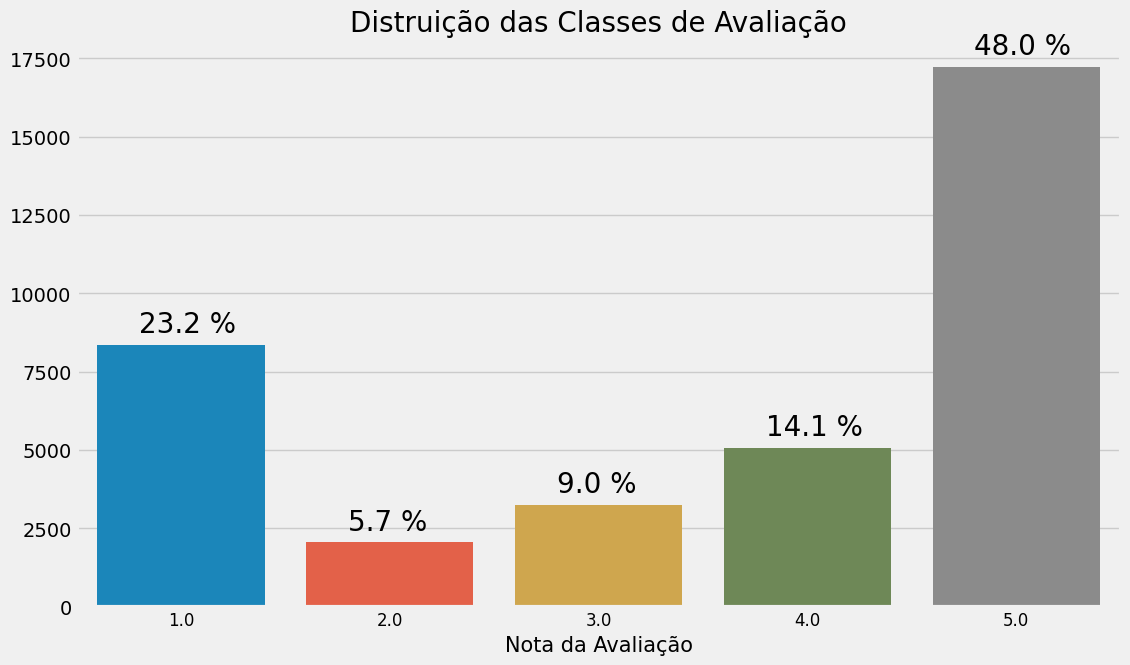

In [76]:
# Plota o % de registros em cada Nota de Avaliação
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['review_score'])
plt.xticks(fontsize=12)
plt.title('Distruição das Classes de Avaliação',fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('Nota da Avaliação', size=15)
for i, v in enumerate(rating_counts):
    ax.text(i-0.2, v+400, rating_p[i], size=20)

O gráfico mostra a variação, desbalanceamento entre os registros. É preciso balancear.

## 3.2.b. Balanceamento



In [77]:
# Avaliações Positivas
pos = df[['review_comment_message', 'review_score']][df['review_score'] == 5]

# Avaliações Negativas
neg = df[['review_comment_message', 'review_score']][df['review_score'] <= 2]

# Novo dataset a partir da combinação de "pos" e "neg"
# Avaliações positivas (pontuação igual a 5) e avaliações negativas (pontuação menor ou igual a 2).

df_balance = pd.concat([pos, neg])

In [78]:
# Define um dicionário de mapeamento
maping = {5: 'Positivo'
         ,2: 'Negativo'
         ,1: 'Negativo'}
df_balance = df_balance.replace(maping)

In [79]:
## Define a semente para a geração de números aleatórios
np.random.seed(seed=100)

# Amostragem aleatória sem reposição de 10.000 comentários de revisão positivos
pos = np.random.choice(df_balance['review_comment_message']
                      [df_balance['review_score'] == 'Positivo'], 10000, replace=False)

# Amostragem aleatória sem reposição de 10.000 comentários de revisão negativos
neg = np.random.choice(df_balance['review_comment_message']
                      [df_balance['review_score'] == 'Negativo'], 10000, replace=False)

# Amostra final concatenada
amostra_final = np.concatenate([pos, neg])

In [80]:
# Mantém apenas as linhas df_balance cujos comentários de revisão estão presentes
# na mostra_final
df_balance = df_balance[df_balance['review_comment_message'].isin(amostra_final)].reset_index(drop=True)

# Embaralha aleatoriamente as linhas
df_balance = df_balance.sample(frac=1).reset_index(drop=True)

In [81]:
# Plota o % de registros em cada Nota de Avaliação
print(df_balance['review_score'].value_counts(normalize=True))
print("\n", df_balance.shape)

Positivo    0.5
Negativo    0.5
Name: review_score, dtype: float64

 (20000, 2)


Conforme definido, de cada conjunto foram selecionadas 20.000 amostras, resultando em um corpus igualmente distribuído com 50% de avaliações positivas e 50% de avaliações negativas.

##3.3. Análise de Sentimentos

A análise de sentimentos é uma aplicação importante de Processamento de Linguagem Natural (PLN) que envolve identificar e extrair informações sobre as emoções e opiniões expressas em textos. O objetivo é determinar se o sentimento expresso em um determinado texto é positivo, negativo ou neutro.

In [82]:
# Carrega o modelo de processamento de linguagem natural (PLN)
# para a língua portuguesa usando a biblioteca SpaCy.
pln = spacy.load("pt_core_news_sm")


In [83]:
# Cria um objeto stemmer (extrator de radical) usando a biblioteca NLTK (Natural Language Toolkit).
# O algoritmo de stemmer utilizado aqui é o RSLP (Removedor de Sufixos da Língua Portuguesa), que é
# uma técnica usada para reduzir palavras à sua forma básica, eliminando os sufixos.
# Isso é útil para agrupar diferentes formas flexionadas de uma palavra em um mesmo radical.
stemmer = nltk.stem.RSLPStemmer()

##3.3.a. Criando a classe para Processamento do Texto

Será criada uma classe que contém várias funções que podem ser utilizadas para realizar o pré-processamento de dados textuais, ou seja, preparar os textos para análise ou modelagem em tarefas de Processamento de Linguagem Natural (PLN).

In [84]:
class DataPrep:

    def __init__(self): # Imprime que o objeto DataPrep está pronto.
        print('DataPrep pronto!')

    def remove_stopwords(self, texto): # Remove stopwords
         # (palavras comuns sem relevância para a análise) e outras palavras predefinidas
         # do texto fornecido como entrada.
        stop_words = [word for word in pln.Defaults.stop_words]
        texto_limpo = " ".join([i for i in texto if i not in set(stop_words)])
        return texto_limpo

    def clean_text(self, texto): # Aplica a remoção de stopwords, caracteres não
        #alfabéticos e outras palavras curtas do texto.
        df_corpus = []
        for i in range(len(texto)):
            df_c = re.sub('[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', texto[i]).lower().split()
            df_corpus.append(df_c)
        df_corpus= pd.Series(df_corpus).apply(lambda x: ' '.join([w for w in x if len(w)>2]))
        corpus = [self.remove_stopwords(r.split()) for r in df_corpus]
        return corpus

    def lemmatization(self, texto): # Extrai o lema das palavras que é a forma básica ou raiz da palavra.
        global pln
        output = []
        for sent in texto:
            doc = pln(" ".join(sent))
            output.append([token.lemma_ for token in doc])
        return output

    def lemmatize(self, texto): # Aplica a limpeza do texto e a lematização
        token = self.lemmatization(pd.Series(self.clean_text(texto)).apply(lambda x: x.split()))
        token_lemma = []
        for i in range(len(token)):
            token_lemma.append(' '.join(token[i]))
        return token_lemma

    def list_freq(self, texto, terms=30): # Lista as palavras mais frequentes do texto.
        all_words = ' '.join([text for text in texto])
        all_words = all_words.split()
        fdist = FreqDist(all_words)
        words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
        d = words_df.nlargest(columns="count", n=terms)
        return d
        print(d[:terms])

    def steming(self, texto): # Extrai a raiz (stem) das palavras do texto usando o algoritmo RSLPStemmer do NLTK.
        global stemmer
        output_1 = []
        for sent in texto:
            doc = " ".join(sent)
            output_2 = []
            for w in doc.split():
                f = stemmer.stem(w)
                output_2.append(f)
            output_1.append(output_2)
        return output_1

    def stemize(self, texto): # Aplica o steming
        token = self.steming(pd.Series(self.clean_text(texto)).apply(lambda x: x.split()))
        token_lemma = []
        for i in range(len(token)):
            token_lemma.append(' '.join(token[i]))
        return token_lemma

    def rm_accents(self, texto) -> list: # Remove acentos e cedilha do texto usando a biblioteca unidecode.
        fixed = list()
        for linha in texto:
            unidecoded_text = unidecode(linha)
            fixed.append(unidecoded_text)
        return fixed

##3.3.b. Pré Processamento do Corpus

A classe criada será usada para processar e pré-processar os dados do dataset df_balance.

In [85]:
dp = DataPrep()

# Remove os acentos e cedilha dos textos na coluna 'review_comment_message' do df_balance.
df_balance['review_comment_message'] = dp.rm_accents(df_balance['review_comment_message'])

# Aplica a limpeza do texto e a lematização nos textos da coluna 'review_comment_message' do df_balance.
corpus = dp.lemmatize(df_balance['review_comment_message'])

DataPrep pronto!


#4.Abordagens | Processamento de Linguagem Natural

# 4.1. Bag of Words

O Bag of Words é uma abordagem simples, porém eficiente, para lidar com dados de texto e é amplamente utilizado em várias tarefas de PLN, como classificação de texto, análise de sentimentos, recuperação de informações e muito mais. Embora ignore a estrutura e a semântica das frases, o Bag of Words oferece uma maneira útil de representar o conteúdo textual como um conjunto de vetores numéricos, que pode ser facilmente utilizado em algoritmos de aprendizado de máquina e outras análises estatísticas.

##4.1.a. Vetorização

O corpus será representado numericamento sob os seguintes parâmetros:
- Uma palavra deve aparecer em pelo menos 2 documentos para ser incluída no vocabulário. (min_df=2)
- Palavras que aparecem em mais de 75% dos documentos serão ignoradas. (max_df=0.75)
- O vetorizador analisará os documentos por palavra. (analyzer='word')
- Os acentos serão removidos dos documentos usando a codificação unicode. (strip_accents='unicode')
-  O vetorizador usará o esquema de ponderação TF-IDF (Term Frequency-Inverse Document Frequency). O TF-IDF atribui pesos às palavras com base na frequência com que aparecem em um documento específico (TF) e na raridade da palavra em todo o corpus (IDF). (use_idf=True)
- O intervalo de n-gramas a ser considerado durante a análise. Aqui, estamos configurando-o para (1,2), o que significa que serão considerados unigramas (palavras individuais) e bigramas (pares de palavras adjacentes). ngram_range=(1,2)
- O número máximo de recursos (palavras) que serão considerados no vocabulário é definido em 10.000. (max_features=10000)

In [86]:
# Transforma uma coleção de documentos de texto (corpus) em uma representação numérica.
vectorizer = TfidfVectorizer(min_df=2, max_df=0.75, analyzer='word',
                             strip_accents='unicode', use_idf=True,
                             ngram_range=(1,2), max_features=10000)

In [87]:
# Aplica o vetorizador ao corpus
X = vectorizer.fit_transform(corpus).toarray()
y = df_balance.loc[:,"review_score"].values

print('X shape: ', X.shape, '\ny shape: ', y.shape)

X shape:  (20000, 10000) 
y shape:  (20000,)


##4.1.b. N-Gram

N-gram é uma sequência contígua de n itens (palavras, caracteres ou outras unidades) em um determinado texto ou sentença. Os n-grams são amplamente utilizados em processamento de linguagem natural (PLN) e linguística computacional como uma técnica fundamental para modelagem de linguagem e análise de texto.

In [88]:
# Lista os nomes das características (ou "features") e
# particionanos os primeiros 20 elementos da lista
feature_names = vectorizer.get_feature_names_out()
feature_names[:20]

array(['abaixo', 'abaixo esperar', 'abajur', 'abencoe', 'abertura',
       'aborrecir', 'abraco', 'abri', 'abri caixo', 'abri chamar',
       'abri embalagem', 'abri pacote', 'abri reclamacao',
       'abri solicitacao', 'abril', 'abrir', 'abrir caixa',
       'abrir chamar', 'abrir embalagem', 'abrir nao'], dtype=object)

##4.2. Multinomial Naive Bayes


O Multinomial Naive Bayes é popular para classificação de texto, especialmente em tarefas como análise de sentimentos, classificação de documentos, categorização de notícias, entre outras. Apesar de suas suposições simplificadoras, ele pode fornecer resultados surpreendentemente bons em muitos cenários e é relativamente eficiente em termos de tempo de treinamento e classificação. No entanto, é importante observar que o desempenho do algoritmo pode depender da qualidade e tamanho dos dados de treinamento, bem como da representação das palavras usada no processo de vetorização do texto.

##4.2.a. Base de Treino e Base de Teste

Teste e treinamento de modelos fazem parte de uma técnica comum na ciência de dados e na aprendizagem de máquina. Envolve a divisão dos dados em dois conjuntos distintos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para ajustar os parâmetros do modelo. O conjunto de teste é usado para avaliar a capacidade do modelo de generalizar, ou seja, sua capacidade de fazer previsões precisas em dados que não foram usados no treinamento.

In [89]:
## A função train_test_split da biblioteca scikit-learn é usada para dividir os
## dados em conjuntos de treinamento e teste. E é composta dos seguintes elementos:

# X e Y são as variáveis de entrada e a variável alvo, respectivamente.
# test_size=0.2 especifica que 20% dos dados serão usados para teste e 80% para treinamento.
# random_state=42 define a semente aleatória como 20, garantindo que a divisão dos dados
# seja a mesma toda vez que o código for executado. Isso é útil para reprodutibilidade.

# A função retornará quatro conjuntos de dados:

# X_train: O conjunto de treinamento de características, que conterá 80% dos dados originais.
# X_test: O conjunto de teste de características, que conterá 20% dos dados originais.
# y_train: A variável alvo do conjunto de treinamento, correspondente às características de X_train.
# y_test: A variável alvo do conjunto de teste, correspondente às características de X_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('treino:', len(y_train))
print('teste:', len(y_test))

treino: 16000
teste: 4000


In [90]:
# Definindo o Modelo de Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

MultinomialNB()

In [91]:
# Usando o Modelo de Naive Bayes para fazer previsões nos dados de teste X_test
y_pred = classifier_nb.predict(X_test)
y_pred_prob = classifier_nb.predict_proba(X_test)

##4.2.b. Avaliando o Modelo

###Acurácia

A acurácia é uma das métricas mais simples e comuns usadas para avaliar o desempenho de um modelo de machine learning em problemas de classificação. Ela representa a proporção de previsões corretas que o modelo fez em relação ao total de previsões.

In [92]:
# Acurácia do Modelo de Naive Bayes
print('Acurácia de: ', "{0:.1f}".format(accuracy_score(y_test, y_pred)*100),'%')

Acurácia de:  92.7 %


###Matriz de Confusão

A matriz de confusão é uma tabela que permite avaliar o desempenho de um modelo de classificação. É especialmente útil quando se tem um conjunto de dados com rótulos conhecidos (verdadeiros) e as previsões feitas pelo modelo (predições). Ela mostra a frequência com que as previsões do modelo correspondem aos rótulos reais.
Da matriz de Confusão se extrais:

* Sensibilidade: Mede a proporção de exemplos positivos corretamente identificados pelo modelo em relação ao número total de exemplos positivos reais.
Sensibilidade = VP / (VP + FN)

* Especificidade: Mede a proporção de exemplos negativos corretamente identificados pelo modelo em relação ao número total de exemplos negativos reais. Especificidde = VN / (Vn +VP)

In [93]:
# Matriz de Confusão do Modelo de Naive Bayes
matriz = confusion_matrix(y_test, y_pred, labels=['Positivo', 'Negativo'])

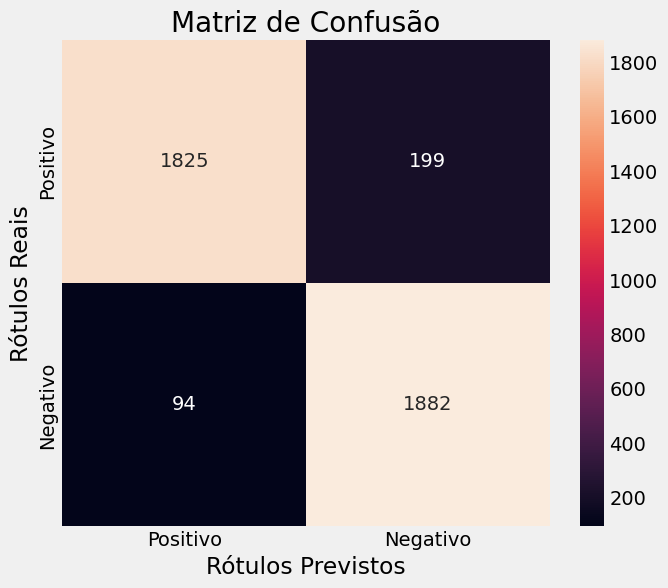

Sensibilidade:  0.95
Especificidade:  0.9


In [94]:
# Imprime a Matriz de Confusão

fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(matriz, annot=True, ax=ax, fmt='.0f')

ax.set_xlabel('Rótulos Previstos')
ax.set_ylabel('Rótulos Reais')
ax.set_title('Matriz de Confusão')
ax.xaxis.set_ticklabels(['Positivo', 'Negativo'])
ax.yaxis.set_ticklabels(['Positivo', 'Negativo']);
plt.show()

sens = matriz[0,0] / (matriz[0,0] + matriz[1,0])
esp = matriz[1,1] / (matriz[0,1] + matriz[1,1])

print('Sensibilidade: ', round(sens,2))
print('Especificidade: ', round(esp,2))


###Naive Bayes | Treinamento

In [95]:
# Define a semente para o gerador de números pseudoaleatórios.
random.seed(5)

In [96]:
# Testa a entrada no Modelo
testes = list()
for i in range(5):
    testes.append(random.choice(df_balance['review_comment_message']))

In [97]:
# Preparação dos Resultados
dp = DataPrep()
testes = dp.rm_accents(testes)
corpus_2 = dp.lemmatize(testes)

DataPrep pronto!


In [98]:
#Imprime os Resultados da Classificação Prevista

print("\nClassificação Prevista:")
testes_transform = vectorizer.transform(corpus_2)
for i in range(len(testes)):
    print("{} {:-<16} {}".format([i+1], classifier_nb.predict(testes_transform)[i], testes[i]))


Classificação Prevista:
[1] Negativo-------- ja esta com quase um mes que fiz o pedido e o produto ainda nao chegou.
[2] Positivo-------- Foi uma otima compra.
[3] Positivo-------- Produto perfeito
Chegou bem antes do prazo
Superou minhas expectativas.
Estao de parabens.
[4] Positivo-------- Produto entregue no prazo e de excelente qualidade. Para quem dorme de lado, o correto e esse travesseiro, para quem dorme de barriga para cima, o correto e um travesseiro um pouco mais baixo. 
[5] Negativo-------- Produto muito fraco 


In [99]:
# Imprime as Probabilidades

testes_transform = vectorizer.transform(corpus_2)
for i in range(len(testes)):
    print("{} {:-<16} {}".format([i+1], str([round(x,2)
          for x in classifier_nb.predict_proba(testes_transform)[i].tolist()]), testes[i]))

[1] [1.0, 0.0]------ ja esta com quase um mes que fiz o pedido e o produto ainda nao chegou.
[2] [0.02, 0.98]---- Foi uma otima compra.
[3] [0.0, 1.0]------ Produto perfeito
Chegou bem antes do prazo
Superou minhas expectativas.
Estao de parabens.
[4] [0.02, 0.98]---- Produto entregue no prazo e de excelente qualidade. Para quem dorme de lado, o correto e esse travesseiro, para quem dorme de barriga para cima, o correto e um travesseiro um pouco mais baixo. 
[5] [0.82, 0.18]---- Produto muito fraco 


O modelo de classificação multinomial Naive Bayes foi treinado sobre uma matriz de 20.000 linhas (sentenças) e 10.000 colunas (termos n-grama), com seleção de 20% dos dados para teste e demonstrou um desempenho extremamente satisfatório, com acurácia igual a 92,7%, sensibilidade de 95% e especificidade de 90%.

É possível identificar que pelo conteúdo dos comentários, a entrega e a qualidade do produto estão entre os tópicos analisados.

##4.3. Word2Vec

Word2Vec é uma técnica popular e eficiente de aprendizado de representações de palavras em linguagem natural, desenvolvida por Tomas Mikolov et al. na Google em 2013. O objetivo do Word2Vec é mapear palavras de um vocabulário para vetores densos de números reais em um espaço de representação semântica.

In [100]:
# Processando o Corpus
sent = [line.split() for line in corpus]
phrases = Phrases(sent, min_count=1, threshold=2, progress_per=1000)
bigram = Phraser(phrases)
sentences = bigram[sent]

####Construção do Modelo

In [101]:
# Construção do o Modelo Word2Vec
word2vec = Word2Vec(min_count=20
                    ,window=3
                    ,sg=0
                    ,vector_size=100
                    ,sample=6e-5
                    ,alpha=0.03
                    ,min_alpha=0.0007
                    ,negative=20
                    ,workers=7
                    ,seed=42)

In [102]:
#Construção o Vocabuláro do Modelo Word2Vec
word2vec.build_vocab(sentences, progress_per=100)

####Word2Vec | Treinamento

In [103]:
# Treinamento do Modelo  Word2vec
word2vec.train(sentences, total_examples=word2vec.corpus_count, epochs=30, report_delay=1)

(479140, 3471780)

####Word2Vec | Pós Processamento do Modelo

In [104]:
# Pós processamento do Modelo Word2Vec
word2vec.init_sims(replace=True)
print("O modelo tem %d termos" % len(word2vec.wv.key_to_index))

O modelo tem 700 termos


In [105]:
# Seleciona termos similares para "Recomendar"
word2vec.wv.most_similar(positive=["recomendar"])

[('certo', 0.9988940954208374),
 ('atender_necessidade', 0.9988715648651123),
 ('avaria', 0.9988680481910706),
 ('excelente_qualidade', 0.9988556504249573),
 ('conforme_esperar', 0.99885094165802),
 ('tambem', 0.99884033203125),
 ('indico', 0.9988355040550232),
 ('pontualidade', 0.9988200068473816),
 ('chegar_perfeito', 0.9988149404525757),
 ('otimos', 0.9988137483596802)]

In [106]:
# Mostra similaridade entre termos "comprar" e "atrasar"
word2vec.wv.similarity("comprar", 'atrasar')

0.9980103

Mais uma vez mostra-se a alta relação dos comentários comentrega e a qualidade do produto.

#7.Conclusão

---

A Análise das avaliações dos comentários no site compras mostrou que a qualidade do produto e a entrega foram os assuntos mais abordados positiva e negativamente.
Isso mostra o perfil clássico do consumidor que fica satisfeito com compras de produtos de qualidade e entregues no prazo e se qualifica como insatisfeito quando recebe um produto fora do esperado e com atraso.